# Forgobike Trip Data Analysis




# Table of Content:
* [Import Libraries needed](#first-bullet)
* [Data Wrangling](#second-bullet)
    * [Assess Data content](#third-bullet)
    * [Data Cleaning](#fourth-bullet)
    * [Feature Extraction](#fifth-bullet)
* [Data Analysis and visualizations](#sixth-bullet)
    * [Univariate Analysis](#7th-bullet)
    * [Bivariate Analysis](#8th-bullet)
    * [Multivariate Analysis](#9th-bullet)

## Import Libraries <a class="anchor" id="first-bullet"></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

## Data Wrangling <a class="anchor" id="second-bullet"></a>

In [4]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.shape

(183412, 16)

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Assessing Data <a class="anchor" id="third-bullet"></a>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

The ID columns are float and should be string instead.

The member birth year is float and should be datetime.

The start and end time columns are object and should be datetime.

In [8]:
df.member_birth_year.unique()

array([1984.,   nan, 1972., 1989., 1974., 1959., 1983., 1988., 1992.,
       1996., 1993., 1990., 1981., 1975., 1978., 1991., 1997., 1986.,
       2000., 1982., 1995., 1980., 1973., 1985., 1971., 1979., 1967.,
       1998., 1994., 1977., 1999., 1987., 1969., 1963., 1976., 1964.,
       1965., 1961., 1968., 1966., 1962., 1954., 1958., 1960., 1970.,
       1956., 1957., 1945., 1900., 1952., 1948., 1951., 1941., 1950.,
       1949., 1953., 1955., 1946., 1947., 1931., 1943., 1942., 1920.,
       1933., 2001., 1878., 1901., 1944., 1928., 1934., 1939., 1930.,
       1902., 1910., 1938., 1927.])

In [9]:
df.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [10]:
df_ages_gt_100 = df[df['member_birth_year'] > 100]
age_counts = df_ages_gt_100['member_birth_year'].value_counts()
print(age_counts)

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64


There are riders with age above 100

In [11]:
df.duplicated().any()

False

In [12]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are missing values across 6 columns

### Cleaning Data <a class="anchor" id="fourth-bullet"></a>

In [13]:
# make a copy of the original data
clean_df = df.copy()

In [14]:
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Define - Change datatypes 

- for the ID columns and member birth year to appropriate datatypes

#### Code

In [15]:
# Convert start_station_id, end_station_id, and bike_id to strings
clean_df['start_station_id'] = clean_df['start_station_id'].apply(str)
clean_df['end_station_id'] = clean_df['end_station_id'].apply(str)
clean_df['bike_id'] = clean_df['bike_id'].apply(str)

# Convert the member_birth_year column to datetime
clean_df['member_birth_year'] = pd.to_numeric(clean_df['member_birth_year'], errors='coerce').astype('Int64')

# Convert the start_time and end_time columns to datetime
clean_df["start_time"] = pd.to_datetime(clean_df["start_time"])
clean_df["end_time"] = pd.to_datetime(clean_df["end_time"])

#### Test

In [16]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

#### Define - Subset and select 

- remove rider with ages greater than 90

#### Code

In [17]:
# Extract the age from the 'year' column using a lambda function
clean_df['rider_age'] = clean_df['member_birth_year'].apply(lambda x: datetime.datetime.now().year - x)

#subset to select ages less than 90 as of this year 2022
clean_df = clean_df[clean_df['rider_age'] < 90]

#### Test

In [18]:
clean_df[clean_df['rider_age'] >= 90]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rider_age


#### Define - Fix Missing Values

#### Code

In [19]:
# extract column names with missing values
columns_with_missing_data = clean_df.columns[clean_df.isnull().any()].to_list()
print(columns_with_missing_data)

['start_station_name', 'end_station_name']


Looks like subsetting for ages less than 90 has fixed the missing values issue.

Theres nothing to be done for the missing values for the station names.

### Feature Extraction  <a class="anchor" id="fifth-bullet"></a>

In [20]:
# extract duration in minutes and hours from the duration in seconds column
clean_df['duration_min'] = clean_df['duration_sec'].apply(lambda x: int(x / 60))
clean_df['duration_hr'] = clean_df['duration_sec'].apply(lambda x: int(x / 3600))

In [21]:
# extract year, month and day from the start time column
clean_df['year'] = pd.to_datetime(clean_df['start_time']).dt.year
clean_df['month'] = pd.to_datetime(clean_df['start_time']).dt.month
clean_df['day'] = pd.to_datetime(clean_df['start_time']).dt.day
clean_df['hour'] = pd.to_datetime(clean_df['start_time']).dt.hour
clean_df['day_of_week'] = pd.to_datetime(clean_df['start_time']).dt.strftime("%A")

# # Convert the 'day_of_week' column to a Categorical object
# clean_df['day_of_week'] = clean_df['day_of_week'].astype('category')

In [22]:
# Extract Season of the year from the Month Column
def season_of_year(season):
    ''' Extract season of the year from month column'''
    
    if season in [12, 1, 2, 3]:
        season = 'Winter'
    elif season in [6, 7, 8]:
        season = 'Summer'
    elif season in [4, 5]:
        season = 'Spring '
    elif season in [9, 10, 11]:
        season = 'Autumn'
    return season

clean_df['season_of_year'] = clean_df['month'].apply(season_of_year)

# # Convert the Series to a Categorical object
# clean_df['season_of_year'] = clean_df['season_of_year'].astype('category')

In [23]:
# Extract Part of the Day from Hour Column
def part_of_day(time):
    ''' Extract part of day from hour column'''
    
    if time in [22,23,0,1,2,3]:
        time = 'Night'
    elif time in range(4, 12):
        time = 'Morning'
    elif time in range(12, 17):
        time = 'Afternoon'
    elif time in range(17, 22):
        time = 'Evening'
    return time

clean_df['part_of_day'] = clean_df['hour'].apply(part_of_day)

# # Convert the Series to a Categorical object
# clean_df['part_of_day'] = clean_df['part_of_day'].astype('category')

In [24]:
def extract_age_groups(data, age_column, group_column):
    ''' Extract age groups from age columns'''
    
    # Convert the ages to integers
    data[age_column] = data[age_column].astype(int)

    # Create a new column for the age groups
    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_groups = ["Young Adults", "Adults", "Mid-Career Adults", "Midlife Adults", "Older Adults", "Senior Citizens", "Elderly"]
    data[group_column] = pd.cut(data[age_column], age_bins, labels=age_groups)
    
    return data

clean_df = extract_age_groups(clean_df, "rider_age", "age_group")

In [25]:
print('Years available: ', clean_df['year'].unique())
print('Months available: ', clean_df['month'].unique())
print('Seasons available: ', clean_df['season_of_year'].nunique())
print('Days of week: ', clean_df['day_of_week'].nunique())
print('Parts of day available: ', clean_df['part_of_day'].nunique())

Years available:  [2019]
Months available:  [2]
Seasons available:  1
Days of week:  7
Parts of day available:  4


From the feature extract, i uncovered that the data spans only:

    - one year (2019)
    - one month (February)
    - one season of the year (winter)

This is not enough to make comparison with

## Data Analysis <a class="anchor" id="sixth-bullet"></a>

--------
Analysis questions:
1. Distribution of age grade
2. Most busy part of day  
3. Most busy day of the week
4. Most popular station by longest ride duration
5. Gender by membership type
6. Age grade with membership type
7. Age grade by prefered hour for rides
8. Most busy hour of the day
9. Average ride per day
10. Ride sharing by duration
11. Total Duration of trips for the available year

### Univariate <a class="anchor" id="7th-bullet"></a>

In [26]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [27]:
print('Maximum ride duration in hours: ', clean_df['duration_hr'].max())
print('Minimun ride duration in Minutes: ', clean_df['duration_min'].min())

Maximum ride duration in hours:  23
Minimun ride duration in Minutes:  1


#### Distribution of age group and birth year

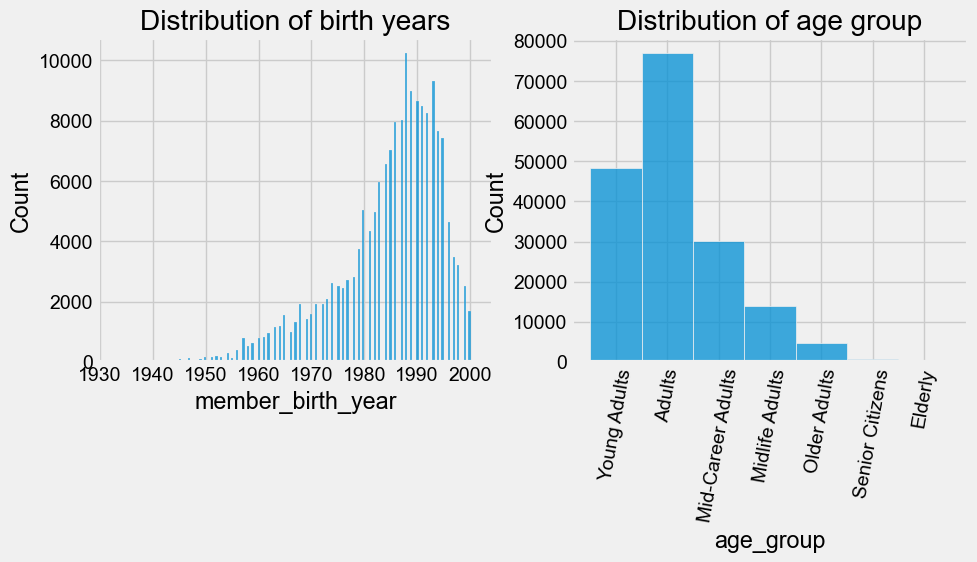

In [28]:
plt.figure(figsize=[10, 4])

plt.subplot(1, 2, 1)
sns.histplot(clean_df['member_birth_year'])
plt.title('Distribution of birth years')

plt.subplot(1, 2, 2)
sns.histplot(clean_df['age_group'])
plt.title('Distribution of age group')
plt.xticks(rotation=80)

sns.set(rc = {'figure.figsize':(10, 4)})

Vast population of users is made up of young adults and adults

####  Distribution of daily information 

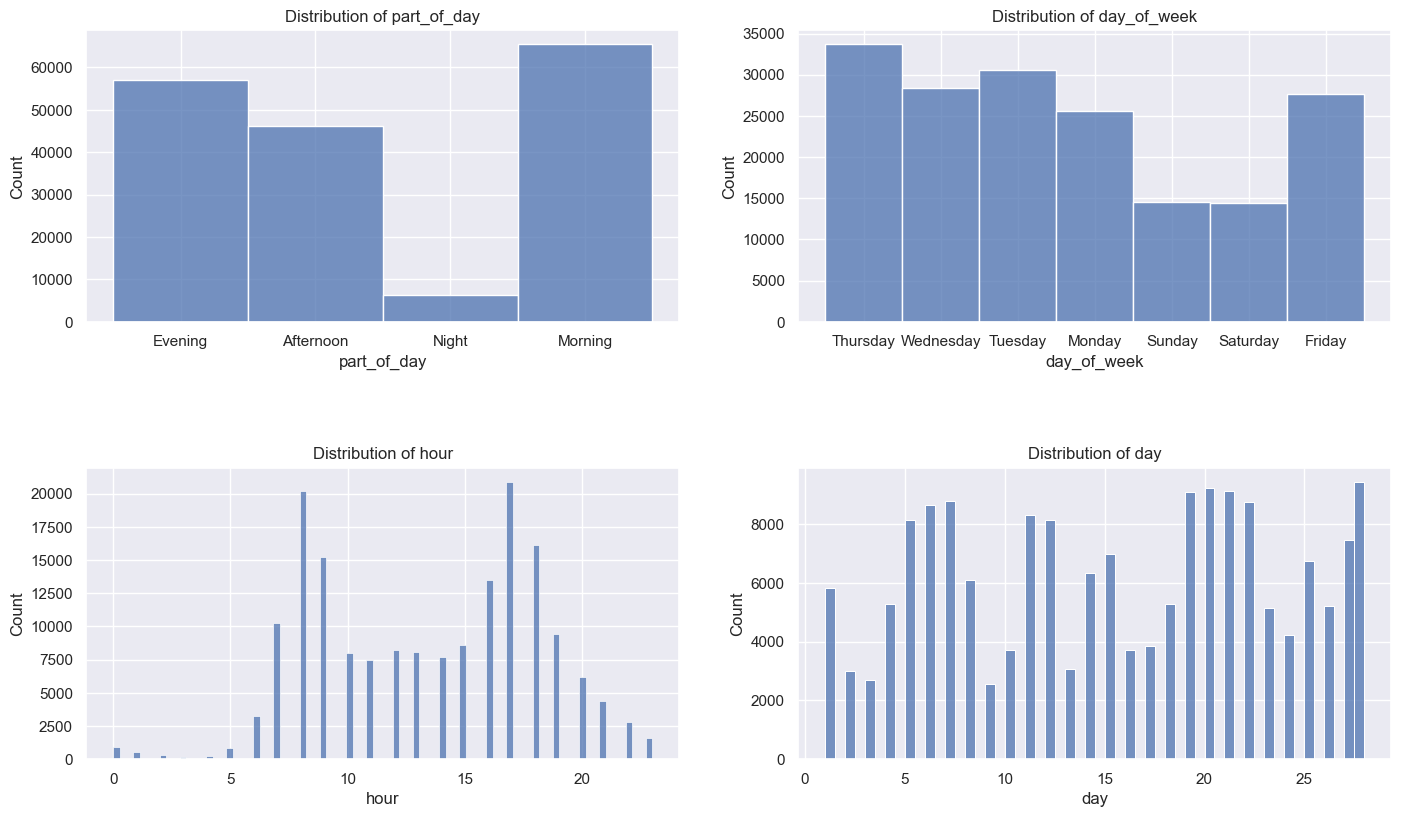

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))
features = ["part_of_day", "day_of_week", "hour", "day"]

for index, feature in enumerate(features):
    plt.subplot(2, 2, index+1)
    sns.histplot(x=clean_df[feature])
    # plt.title(feature)
    plt.title('Distribution of ' + feature)
    # plt.xticks(rotation=90)

sns.set(rc = {'figure.figsize':(10, 4)})
plt.subplots_adjust(hspace=0.5)

Most rides occur in the morning and evenings.

There are more ride records for thursdays rides than saturday and sundays.

The distribution for hour is bimodal and for day is multimodal.


#### Distribution of membership information

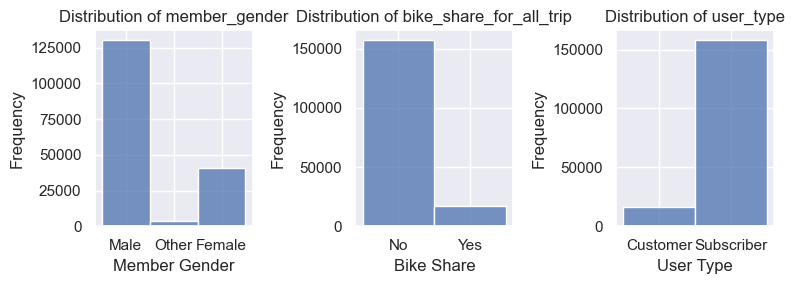

In [30]:
# Set the figure size and create the figure and axis objects
fig, ax = plt.subplots(1, 3, figsize=(8, 3))

# Plot the first histogram
sns.histplot(x=clean_df["member_gender"], ax=ax[0])
ax[0].set_xlabel('Member Gender')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of member_gender')

# Plot the second histogram
sns.histplot(x=clean_df["bike_share_for_all_trip"], ax=ax[1])
ax[1].set_xlabel('Bike Share')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of bike_share_for_all_trip')

# Plot the third histogram
sns.histplot(x=clean_df["user_type"], ax=ax[2])
ax[2].set_xlabel('User Type')
ax[2].set_ylabel('Frequency')
ax[2].set_title('Distribution of user_type')

plt.subplots_adjust(wspace=1)
plt.tight_layout()

There are more male users than female.

There are more records for non-bike shared rides.

Most users are subscribers.

#### Total Duration of trips in hours

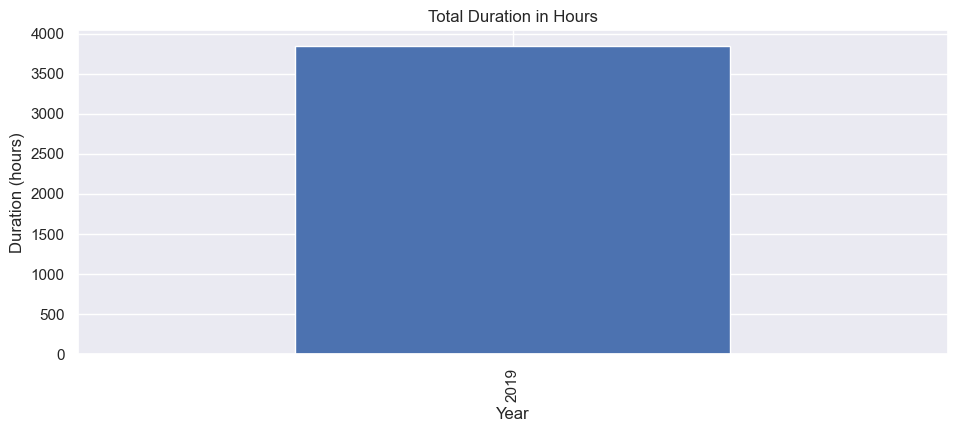

In [31]:
plt.figure(figsize=[10, 4])

# Group the data by year and calculate the total duration in hours for year 2019
duration_by_year = clean_df.groupby('year')['duration_hr'].sum()  

# Create a bar chart
duration_by_year.plot(kind='bar')

# Set the chart title and labels
plt.title('Total Duration in Hours');
plt.xlabel('Year')
plt.ylabel('Duration (hours)');

In [32]:
total_duration_hr = clean_df['duration_hr'].sum()  # Calculate the total duration in hours

print(f'Cummulatively, there are a total of {total_duration_hr} hours')


Cummulatively, there are a total of 3849 hours


### Bivariate <a class="anchor" id="8th-bullet"></a>

#### Most Busy day of the week

---

 Longer ride durations occur on saturdays and sundays
 
---

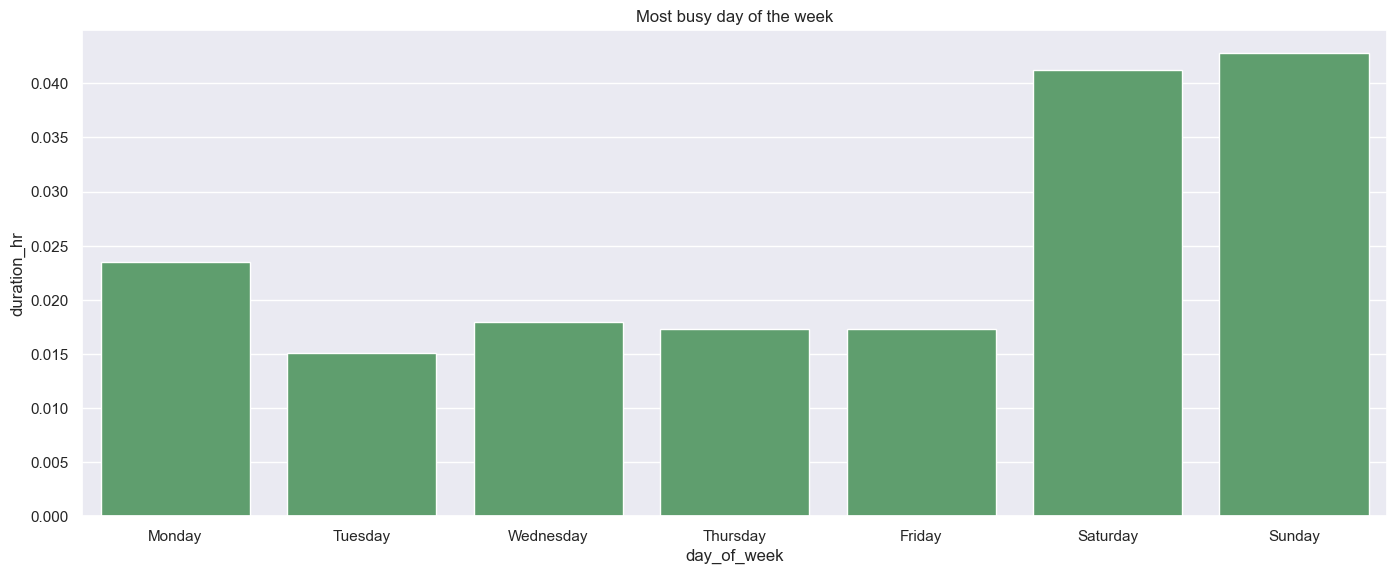

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x = 'day_of_week', y = 'duration_hr', color='g', ci= None,
data = clean_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
ax.set_title('Most busy day of the week');
plt.show();

#### Most popular station

---

The most popular station is located at Powell St BART Station (Market St at 4th St)

---

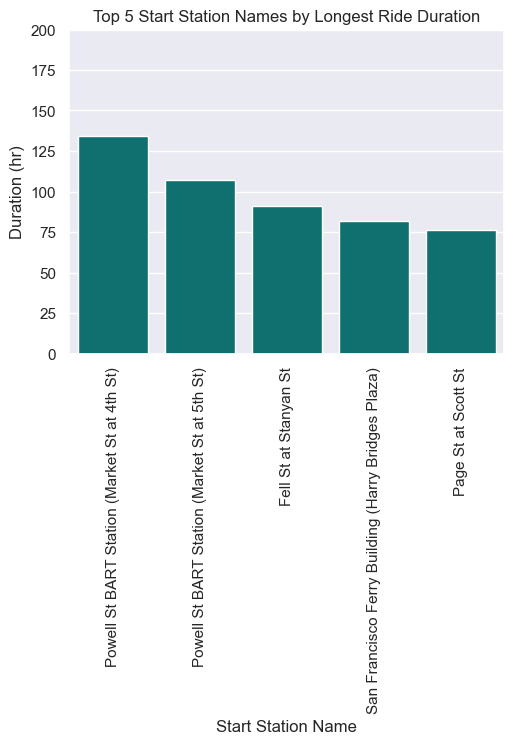

In [34]:
# Group the data by start station name and sum the duration_hr for each start station
df_grouped = clean_df.groupby('start_station_name')['duration_hr'].sum().reset_index()

# Sort the results in descending order by total duration
df_sorted = df_grouped.sort_values(by='duration_hr', ascending=False)

top_5 = df_sorted.nlargest(n=5, columns='duration_hr')

# Set the labels and data for the barplot
labels = top_5['start_station_name']
data = top_5['duration_hr']

# Create the barplot
plt.figure(figsize=[5, 4])
sns.barplot(x=labels, y=data, color='teal')

# Add a title and labels to the plot
plt.title('Top 5 Start Station Names by Longest Ride Duration')
plt.xlabel('Start Station Name')
plt.ylabel('Duration (hr)')
plt.xticks(rotation=90)
plt.ylim(0, 200);

#### Age group with longest ride duration

---
Surprisingly, elderly people spend more time riding than older adults

---

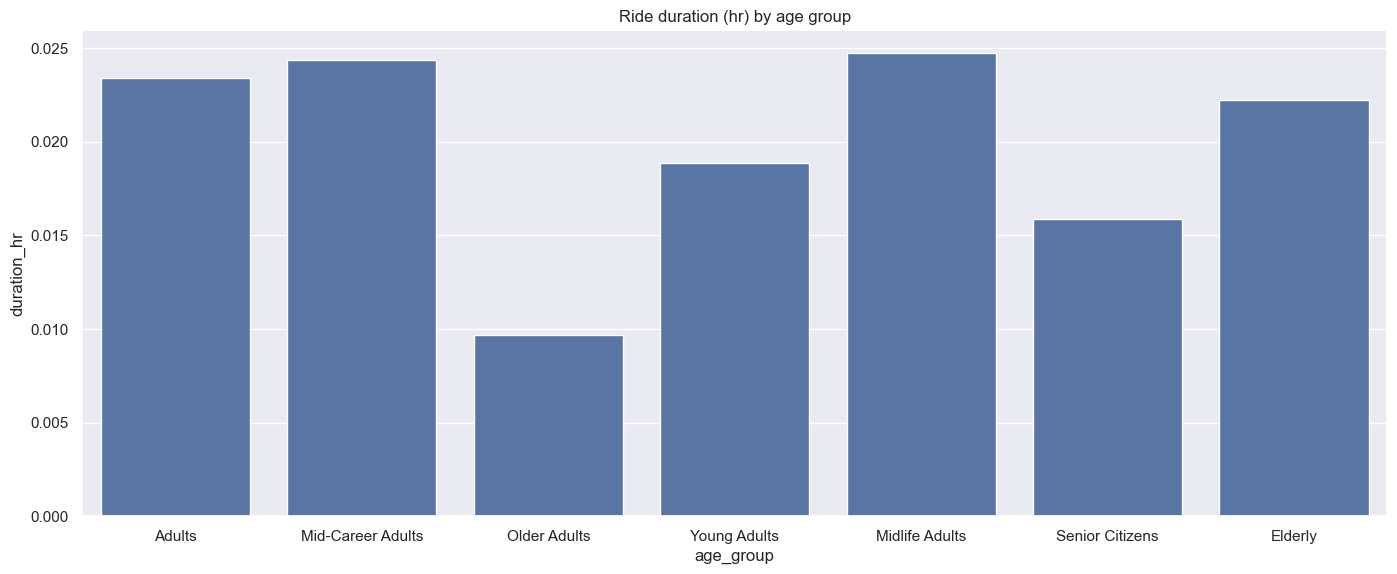

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x = 'age_group', y = 'duration_hr', color='b', ci= None,
data = clean_df, order=['Adults', 'Mid-Career Adults', 'Older Adults', 
                        'Young Adults', 'Midlife Adults', 'Senior Citizens', 'Elderly'])
ax.set_title('Ride duration (hr) by age group');

#### Age grade with membership type

--- 
There are more adult customers amongst the age group. However, there are generally more subscribers than customers

---

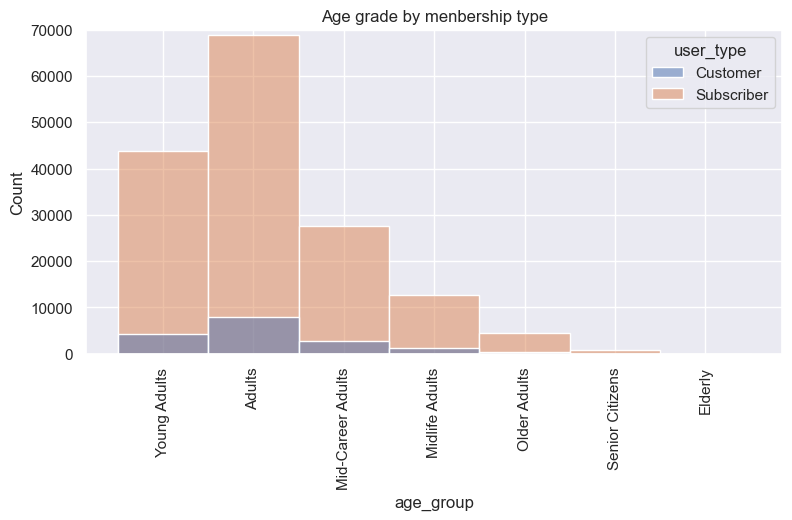

In [36]:
plt.figure(figsize=(8, 4))
sns.histplot(x='age_group', hue='user_type', data=clean_df)
plt.title('Age grade by menbership type')
plt.xticks(rotation=90)
plt.ylim(0, 70000);

#### Age grade by prefered hour for rides

---
Young adult, adults and elderly like to ride into the night, whereas older adults and senior citizens like to ride before midnight

---

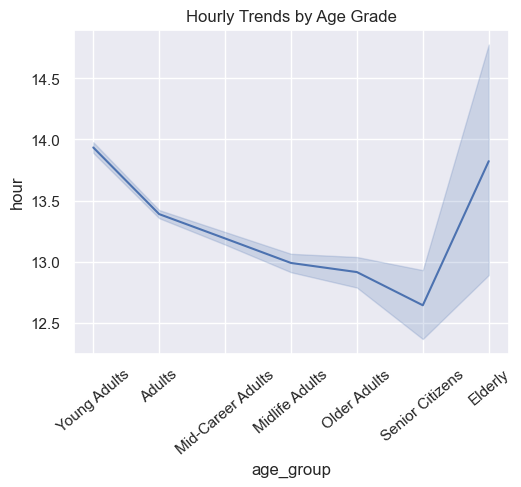

In [37]:
plt.figure(figsize=[5, 4])
sns.lineplot(data=clean_df, y='hour', x='age_group')
plt.xticks(rotation = 40)
plt.title('Hourly Trends by Age Grade');

#### Most busy hour of the day

---
The most busy hour of day is usually midnight

---

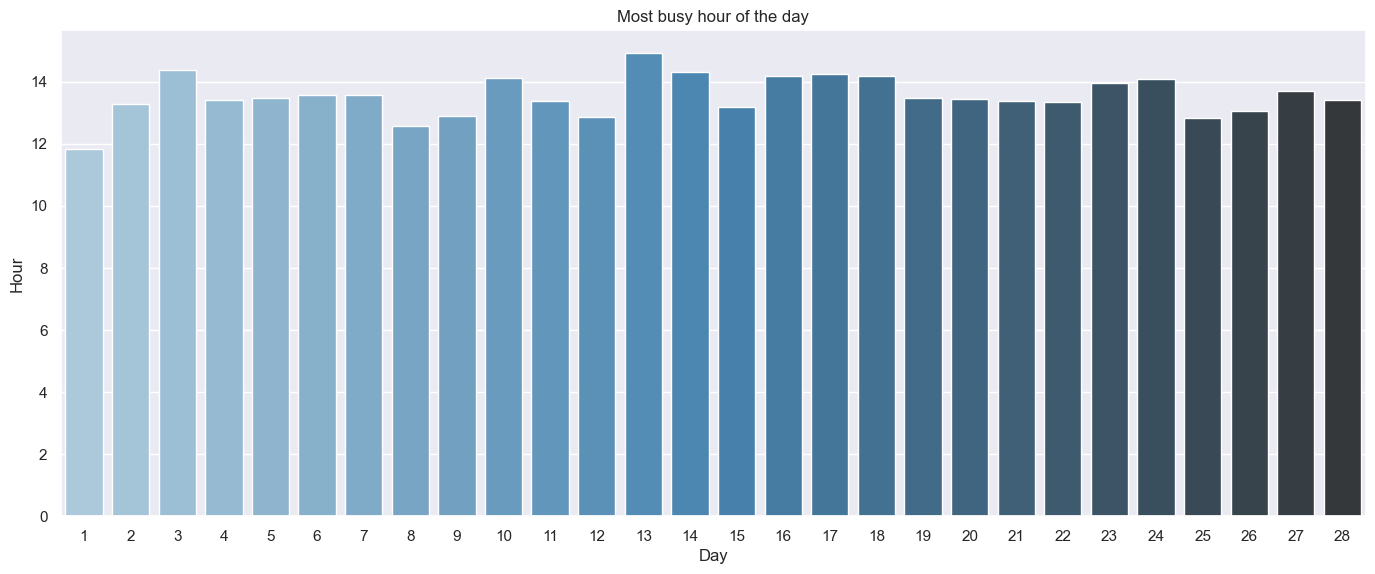

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x = 'day', y = 'hour', ci= None, data = clean_df, palette='Blues_d')
ax.set_xlabel('Day')
ax.set_ylabel('Hour')
ax.set_title('Most busy hour of the day')
plt.show()

#### Average ride per day

---
For rides recorded in february, most exceeds the average ride duration in seconds with the highest between days 15 and 18

---

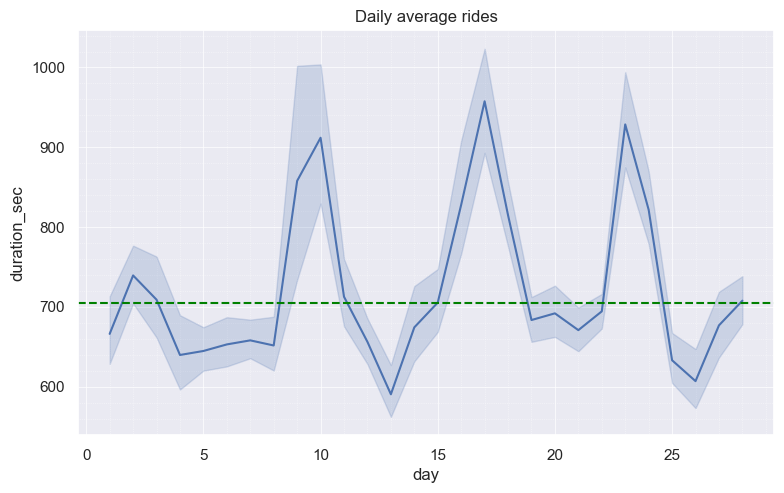

In [39]:
# show average rating numerator by daily change
f, ax = plt.subplots(figsize = (8, 5))
sns.lineplot(data = clean_df, x = "day", y = "duration_sec")

ride_avg= clean_df['duration_sec'].mean()
ax.axhline(ride_avg, color = 'green', linestyle='--', label = f"Mean - {ride_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which = 'major', linestyle = '-', linewidth = 0.5, color = 'white',)
ax.grid(which = 'minor', linestyle = ':', linewidth = 0.5, color = 'white', alpha = 0.7)

plt.title('Daily average rides')
plt.show()

### Multivariate <a class="anchor" id="9th-bullet"></a>

#### Ride sharing by duration and hour of day

---
The longer the ride duration, the more unlikely it is a shared ride

---

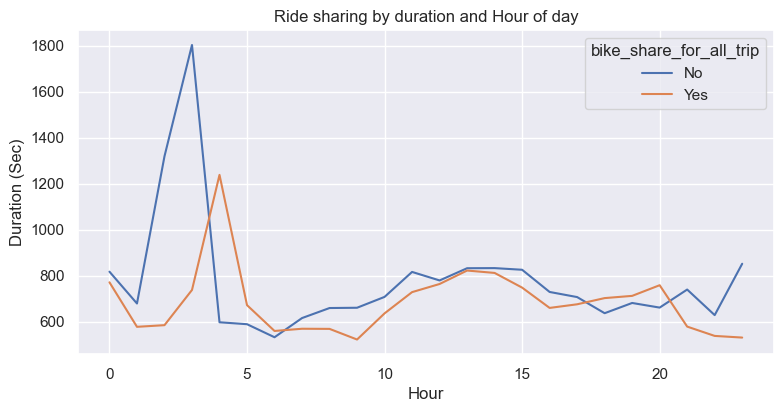

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x = 'hour', y = 'duration_sec', ci= None, data = clean_df, hue='bike_share_for_all_trip')
ax.set_xlabel('Hour')
ax.set_ylabel('Duration (Sec)')
ax.set_title('Ride sharing by duration and Hour of day');

#### Ride sharing by duration and rider age

----
Midlife career adults and midlife adults tend to share rides more than young adults and the elderly

---

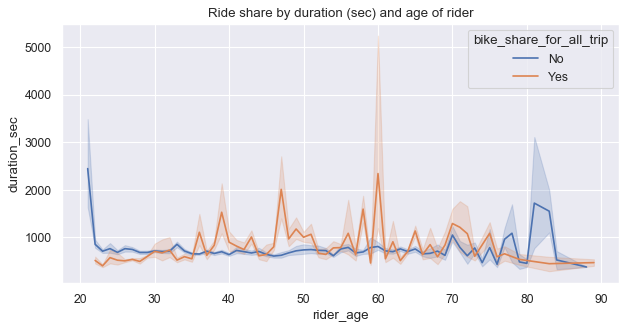

In [41]:
plt.figure(figsize=(8,4),dpi=80)
sns.lineplot(data=clean_df, x="rider_age", y='duration_sec', hue="bike_share_for_all_trip")
plt.title('Ride share by duration (sec) and age of rider');

#### Ride duration by member gender and user type

---
Men tend to ride for longer hours than women and this cuts across the user types

---

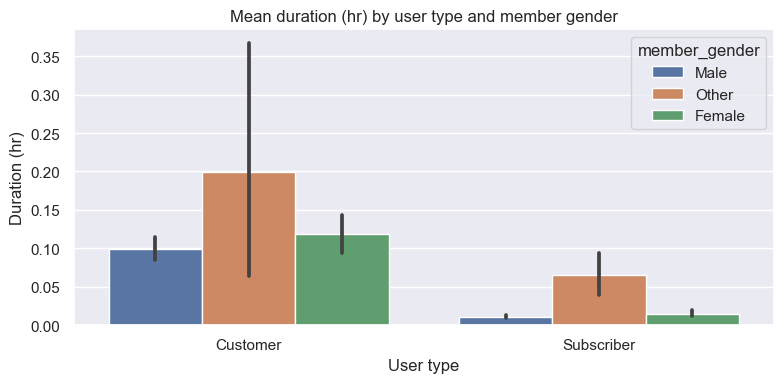

In [42]:
# Set the figure size and create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the bar plot
sns.barplot(x='user_type', y='duration_hr', hue='member_gender', data=clean_df)

# Set the x-axis label
plt.xlabel('User type')

# Set the y-axis label
plt.ylabel('Duration (hr)')

# Set the plot title
plt.title('Mean duration (hr) by user type and member gender')

# Adjust the layout
plt.tight_layout()


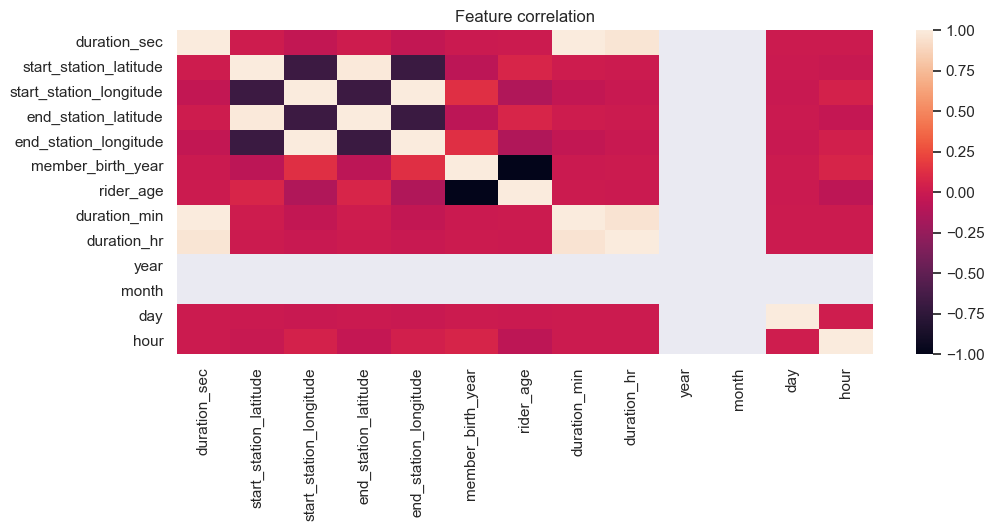

In [43]:
sns.heatmap(clean_df.corr())
plt.title('Feature correlation');

The features have very weak correlations

### Conclusion

----

For general anaysis, i uncovered
- Most rides occur in the morning and evenings
- Though there are more ride records for tuesdays and thursdays, the longest ride durations in hours occur on saturdays and sundays
- The most busy hour of day is usually midnight
- For rides recorded (in february), most exceeds the average ride duration in seconds with the highest between days 15 and 18
- The longer the ride duration, the more unlikely it is a shared ride
- Midlife career adults and midlife adults tend to share rides more than young adults and the elderly
- There are more subscribers than customers
- Men ride for longer hours than women

----

In [ ]:
!jupyter nbconvert bike_trip_analysis.ipynb --to slides --post serve --no-input --no-prompt